In [2]:
# Import necessary modules and libraries, define input and output layers, and load MNIST dataset 
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [3]:
#Autoencoder without hidden layer 

In [4]:
# Define the dimension of the encoding space
encoding_dim = 64 

input_img = Input(shape=(784,)) #input layer with shape

encoded = Dense(encoding_dim, activation='relu')(input_img) 
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)  # Define the autoencoder model, mapping input to output
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] # Retrieve the decoder layer from the autoencoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model with 'adadelta' optimizer and 'binary_crossentropy' loss function
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
# Load the MNIST dataset, unpacking training and testing images into x_train and x_test
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values of training and testing images to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape training and testing images to flatten them into a 1D array
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder model using training data, while validating on testing data
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test) # Encode the testing images using the trained encoder model
decoded_imgs = decoder.predict(encoded_imgs) # Decode the encoded images using the trained decoder model

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6957 - val_loss: 0.6955
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6945 - val_loss: 0.6943
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


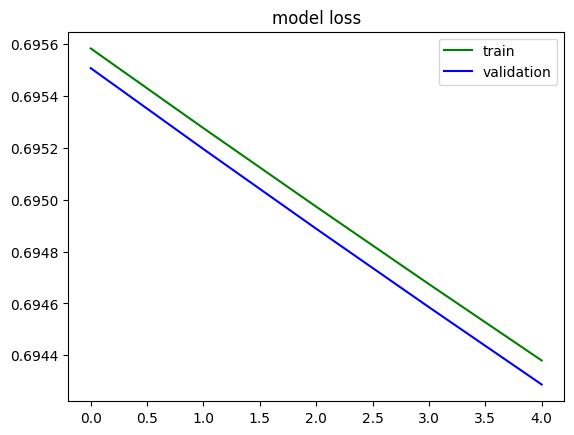

In [6]:
# graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color="green") # Plot the training loss history with green color
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss') # Set the title of the plot
plt.legend(['train', 'validation'], loc='upper right')
# Display the plot
plt.show()

In [7]:
#1.Autoencoder with hidden layer

In [8]:
# Define the size of the input layer,hidden layer and code layer
input_size = 784
hidden_size = 128
code_size = 32

# Define the input layer, first hidden layer, code layer and second hidden layer with 'relu' activation function
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
# Compile the autoencoder model with 'adam' optimizer and 'binary_crossentropy' loss function
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
# Convert pixel values of training and testing images to floating point and normalize them to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Reshape training and testing images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Train the autoencoder model using training data, while validating on testing data
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3379 - val_loss: 0.1502
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1428 - val_loss: 0.1232
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1221 - val_loss: 0.1137
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1133 - val_loss: 0.1069
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1075 - val_loss: 0.1030


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


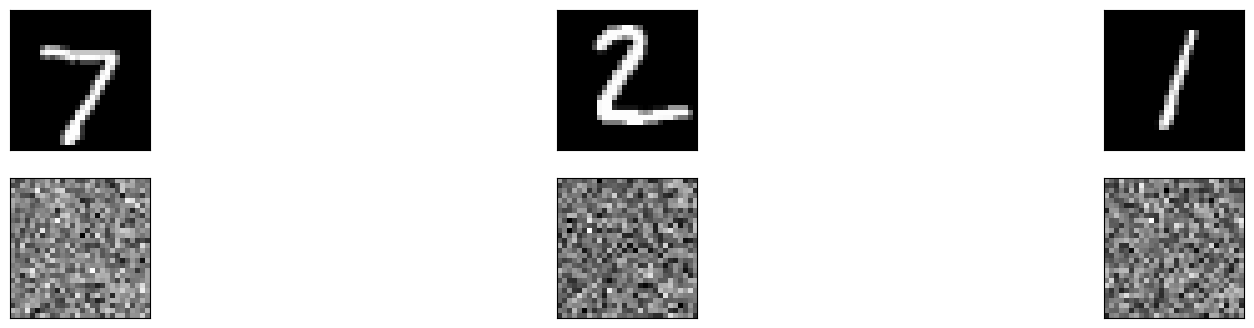

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#import the matplotlib library 
import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() #show the plot

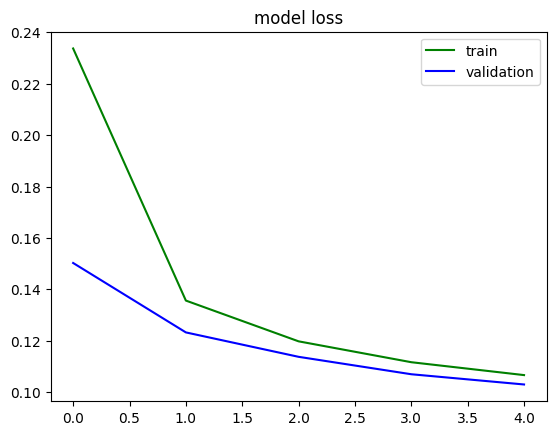

In [11]:
# graph
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
#2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
# Also, visualize the same test data before reconstruction using Matplotlib
#3. Use denoisening autoencoder, to reconstruct the input,
#4. Plot loss and accuracy using the history object.



In [13]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value
x_train.shape, x_test.shape

# Reshape training and test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
(x_train.shape, x_test.shape)
input_dim = x_train.shape[1]  #Define input dimension
encoding_dim = 64

# Calculate compression factor
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential() 
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

# Print summary of the autoencoder model
autoencoder.summary()
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

# Add noise to test images
noise = np.random.normal(loc=0.1, scale=0.1, size=x_test.shape)
noised_images = x_test + noise
encoded_imgs = encoder.predict(noised_images) #Encode noised images
decoded_imgs = autoencoder.predict(noised_images) # Reconstruct noised images using the autoencoder model

Compression factor: 12.25


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3500 - val_loss: 0.1618
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1523 - val_loss: 0.1258
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1222 - val_loss: 0.1075
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1061 - val_loss: 0.0971
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0966 - val_loss: 0.0899
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
